<a href="https://colab.research.google.com/github/RFHertel/ESOF-4011/blob/main/Lab4_K_Means_Rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means ESOF 4011 Lab 4 Solution

### Lab Instructor: Robert Hertel


Notes:

1) Please share all links with me in the future by pressing share in the top right corner

2) If the notebook doesn't run correctly sometimes restarting the kernal under the runtime menu is helpful

Introduction Format:

Student Name: XXXXXX

Sudent ID: XXXXXX

Lab No.: 4 

Colab link: https://colab.research.google.com/drive/16rqvcPUsU1_eLWxnzp--getV5POIT97j#scrollTo=lgCVLGXlkqyc

### 1) Pseudocode

1 Set K to be 4
2 Create an array to hold all of the Euclidean distances of each point the centroids

3 Create an empty centroids array 

4 Fill the centroids array with 4 random centroid (x,y) points. Note: You can also choose to assign 4 random points in the problem set to be the centroids. 

5 Create a function and input initial parameters into the function. The problem set of points, centroids, k value and so on are all parameters to define in the function. 

6 Start with creating an array within the function to contain the Euclidean distance of the 12 points in the set to each of the centroids
7 Find out which centroid each point belongs to by finding the smallest distance to a centroid for each point in the set. Assign each point in the set to one of the centroids

8 compute the means of 4 separated clusters (x,y) 

9 update the centroids to the means 

10 Repeat Steps 6 to 9 for as many iterations as you set (once the points continue to remain set to the same centroids the iterations aren’t necessary to continue)

11 Return the final positions of the centroids



### Sklearn libray tool used to generate assignment points:

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


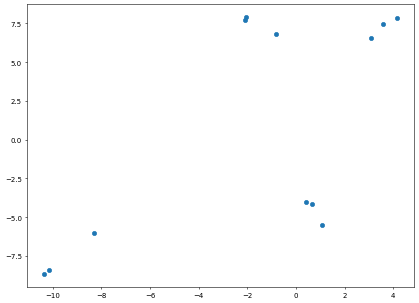

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=12, centers=4, random_state=100)
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':50})
plt.scatter(X[:, 0], X[:, 1]);

In [ ]:
X

array([[-10.15750202,  -8.41105332],
       [-10.3437585 ,  -8.68693583],
       [ -8.28664122,  -6.02701241],
       [  4.14598204,   7.87861123],
       [  0.41007185,  -3.99744881],
       [ -0.83692738,   6.7911115 ],
       [  0.678603  ,  -4.17761085],
       [  3.59950039,   7.4541373 ],
       [  1.08927851,  -5.50265563],
       [ -2.04092856,   7.92525533],
       [ -2.09324324,   7.71236972],
       [  3.08874364,   6.57273112]])

The assignment points given in the assignment were the same as can be seen here. The sklearn.datasets.samples_generator creates these points to be the same every time as random state = 100 when using the make_blobs() function

In [ ]:
X = np.array([[-10.15750202,  -8.41105332],
       [-10.3437585 ,  -8.68693583],
       [ -8.28664122,  -6.02701241],
       [  4.14598204,   7.87861123],
       [  0.41007185,  -3.99744881],
       [ -0.83692738,   6.7911115 ],
       [  0.678603  ,  -4.17761085],
       [  3.59950039,   7.4541373 ],
       [  1.08927851,  -5.50265563],
       [ -2.04092856,   7.92525533],
       [ -2.09324324,   7.71236972],
       [  3.08874364,   6.57273112]])


### 2) Code To perform simple K-means algorithm. 

1st Part sets up initial configuration ie. setting initial values and giving the k-means algorithm initial centroids



In [ ]:
# setting the number of training examples
m=X.shape[0]
print(m)

n=X.shape[1] 
print(n)

n_iter=50


12
2


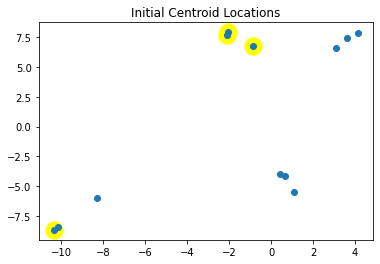

In [ ]:
#I have set the K value to be 4 and also initialized the centroids randomly at first using the random.randint() function.

# computing the initial centroids randomly
K=4
import random

# creating an empty centroid array
centroids=np.array([]).reshape(n,0) 

# how to generate 4 random centroids
#for k in range(K):
    #centroids=np.c_[centroids,X[random.randint(0,m-1)]]

# we'll this set of random centroids for the lab
centroids = np.array([[ -2.09324324, -10.3437585 ,  -2.04092856,  -0.83692738],
       [  7.71236972,  -8.68693583,   7.92525533,   6.7911115 ]])

plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Initial Centroid Locations')
plt.show()

#### Define function

In [ ]:
def Kmeans(X, m ,centroids, K, n_iter):
    """
    :param X: The array of points
    :param m: The number of training examples
    :param centroids: A NumPy array of initial centroids
    :param K: Then number of clusters
    :param K: Then number of iterations the program runs
    :return: The final centroid locations
    """
    # output={}

    # creating an empty array
    euclid=np.array([]).reshape(m,0)

    # finding distance between for each centroid
    for k in range(K):
          dist=np.sum((X-centroids[:,k])**2,axis=1)
          euclid=np.c_[euclid,dist]
    print('euclid')
    print(euclid)

    # storing the minimum value we have computed
    minimum=np.argmin(euclid,axis=1)+1
    print('minimums')
    print(minimum)

    # computing the mean of separated clusters
    cent={}
    for k in range(K):
      cent[k+1]=np.array([]).reshape(2,0)


    # assigning of clusters to points

    for k in range(m):
      cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]

    for k in range(K):
      cent[k+1]=cent[k+1].T

    # computing mean and updating it
    print('means')
    for k in range(K):
        centroids[:,k]=np.mean(cent[k+1],axis=0)
        print(centroids[:,k])

    # repeating the above steps again and again
    for i in range(n_iter):
        euclid=np.array([]).reshape(m,0)
        for k in range(K):
            dist=np.sum((X-centroids[:,k])**2,axis=1)
            euclid=np.c_[euclid,dist]
        C=np.argmin(euclid,axis=1)+1
        cent={}
        for k in range(K):
              cent[k+1]=np.array([]).reshape(2,0)
        for k in range(m):
              cent[C[k]]=np.c_[cent[C[k]],X[k]]
        for k in range(K):
              cent[k+1]=cent[k+1].T
        for k in range(K):
              centroids[:,k]=np.mean(cent[k+1],axis=0)
    final=cent
    return final

In [ ]:
final = Kmeans(X, m ,centroids, K, n_iter) 

euclid
[[3.24997040e+02 1.10802636e-01 3.32753745e+02 3.17978927e+02]
 [3.37008225e+02 0.00000000e+00 3.44901880e+02 3.29949787e+02]
 [2.27128800e+02 1.13069241e+01 2.33674702e+02 2.19802537e+02]
 [3.89555683e+01 4.84369930e+02 3.82800384e+01 2.60120420e+01]
 [1.43386436e+02 1.37636156e+02 1.48158277e+02 1.17948041e+02]
 [2.42704625e+00 3.29949787e+02 2.73590107e+00 0.00000000e+00]
 [1.49054770e+02 1.41826465e+02 1.53875222e+02 1.22609702e+02]
 [3.24740140e+01 4.54948710e+02 3.20363909e+01 2.01214946e+01]
 [1.84765340e+02 1.40853976e+02 1.90106989e+02 1.54846979e+02]
 [4.80571087e-02 3.44901880e+02 0.00000000e+00 2.73590107e+00]
 [0.00000000e+00 3.37008225e+02 4.80571087e-02 2.42704625e+00]
 [2.81517642e+01 4.13289549e+02 2.81428586e+01 1.54585829e+01]]
minimums
[2 2 2 4 4 4 4 4 2 3 1 4]
means
[-2.09324324  7.71236972]
[-6.92465581 -7.1569143 ]
[-2.04092856  7.92525533]
[1.84766226 3.42025525]


### Initial set for comparison

Text(0.5, 1.0, 'Original Dataset')

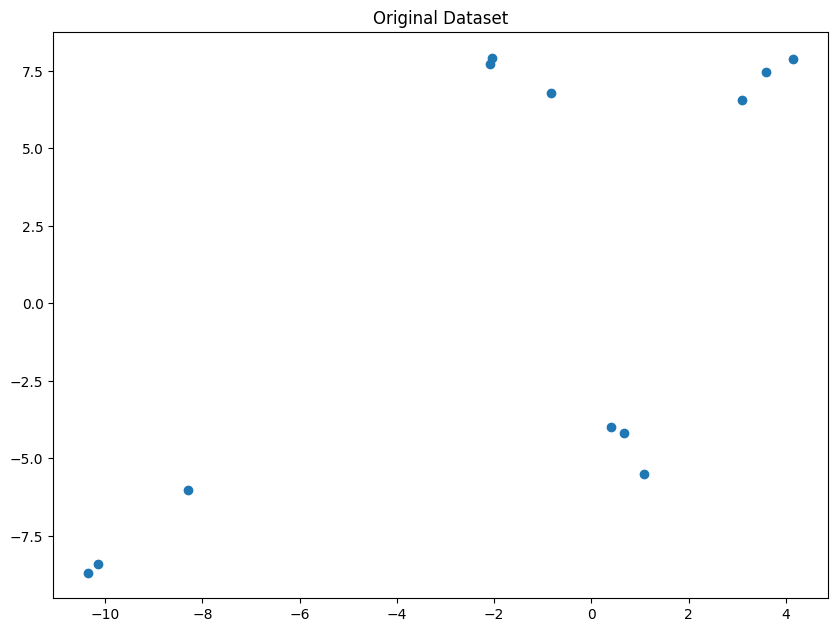

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')

### Final result

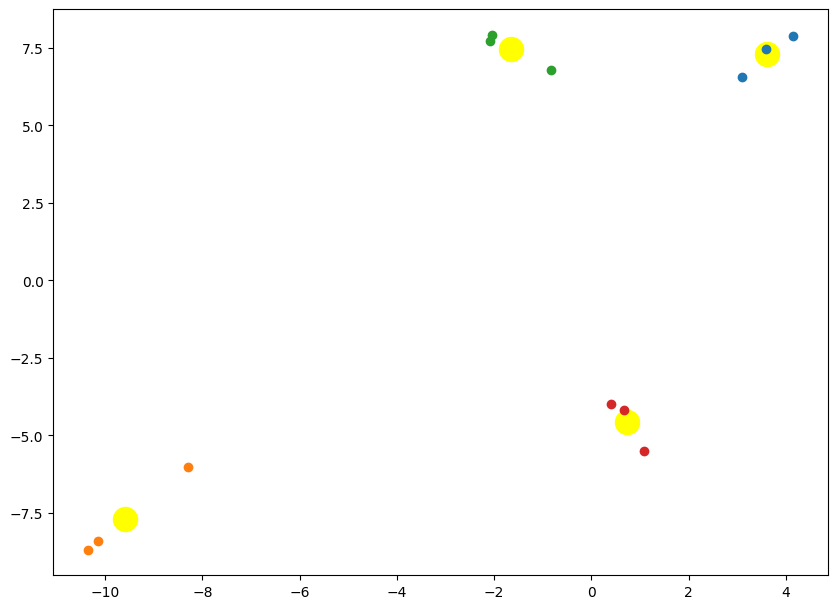

In [ ]:
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()